In [2]:
# Ploting packages
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Date wrangling
from datetime import datetime, timedelta
from matplotlib.dates import DateFormatter

# Data wrangling
import pandas as pd 

# The deep learning class
from deep_model import DeepModelTS

# Reading the configuration file
import yaml

# Directory managment 
import os

#Seaborn for beautiful graphs
import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='deep', font='sans-serif', font_scale=1.5, color_codes=True, rc=None)
#import seaborn; seaborn.set()
#seaborn.set(font_scale=1.15,style="whitegrid")

#Date formatting
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

#statistics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
from math import sqrt
import statistics

In [3]:
# Reading the hyper parameters for the pipeline
with open(f'{os.getcwd()}\\conf.yml') as file:
    conf = yaml.load(file, Loader=yaml.FullLoader)

In [4]:
# Reading the data 
d = pd.read_csv('Datetime_kwh_hr_2001_3103.csv')
d['Datetime'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in d['Datetime']]

# Making sure there are no duplicated data
# If there are some duplicates we average the data during those duplicated days
d = d.groupby('Datetime', as_index=False)['kwh'].mean()

# Sorting the values
d.sort_values('Datetime', inplace=True)

In [5]:
# Remove outlier data
d.drop(d[d.kwh < 0.001].index, inplace=True)
d.drop(d[d.kwh > 1.0].index, inplace=True)

In [6]:
# Initiating the class 
deep_learner = DeepModelTS(
    data=d, 
    Y_var='kwh',
    lag=conf.get('lag'),
    LSTM_layer_depth=conf.get('LSTM_layer_depth'),
    epochs=conf.get('epochs'),
    train_test_split=conf.get('train_test_split') # The share of data that will be used for validation
)

In [7]:
# Fitting the model 
model = deep_learner.LSTModel()

Train on 1469 samples, validate on 163 samples
Epoch 1/500
1469/1469 [==============================] - 1s 567us/step - loss: 0.0387 - acc: 0.0000e+00 - val_loss: 0.0350 - val_acc: 0.0000e+00
Epoch 2/500
1469/1469 [==============================] - 0s 293us/step - loss: 0.0254 - acc: 0.0000e+00 - val_loss: 0.0247 - val_acc: 0.0000e+00
Epoch 3/500
1469/1469 [==============================] - 0s 293us/step - loss: 0.0174 - acc: 0.0000e+00 - val_loss: 0.0236 - val_acc: 0.0000e+00
Epoch 4/500
1469/1469 [==============================] - 1s 376us/step - loss: 0.0175 - acc: 0.0000e+00 - val_loss: 0.0230 - val_acc: 0.0000e+00
Epoch 5/500
1469/1469 [==============================] - 1s 395us/step - loss: 0.0161 - acc: 0.0000e+00 - val_loss: 0.0224 - val_acc: 0.0000e+00
Epoch 6/500
1469/1469 [==============================] - 1s 397us/step - loss: 0.0162 - acc: 0.0000e+00 - val_loss: 0.0225 - val_acc: 0.0000e+00
Epoch 7/500
1469/1469 [==============================] - 1s 379us/step - loss: 0.01

Epoch 57/500
1469/1469 [==============================] - 1s 361us/step - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 58/500
1469/1469 [==============================] - 1s 361us/step - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 59/500
1469/1469 [==============================] - 1s 342us/step - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 60/500
1469/1469 [==============================] - 0s 332us/step - loss: 0.0125 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 61/500
1469/1469 [==============================] - 1s 363us/step - loss: 0.0124 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 62/500
1469/1469 [==============================] - 0s 340us/step - loss: 0.0124 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 63/500
1469/1469 [==============================] - 0s 331us/step - loss: 0.0124 - acc: 0.0000e+00 - val_loss: 0.0184 

Epoch 113/500
1469/1469 [==============================] - 0s 313us/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0176 - val_acc: 0.0000e+00
Epoch 114/500
1469/1469 [==============================] - 0s 305us/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0176 - val_acc: 0.0000e+00
Epoch 115/500
1469/1469 [==============================] - 0s 321us/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0176 - val_acc: 0.0000e+00
Epoch 116/500
1469/1469 [==============================] - 0s 306us/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0176 - val_acc: 0.0000e+00
Epoch 117/500
1469/1469 [==============================] - 0s 306us/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 118/500
1469/1469 [==============================] - 0s 314us/step - loss: 0.0116 - acc: 0.0000e+00 - val_loss: 0.0176 - val_acc: 0.0000e+00
Epoch 119/500
1469/1469 [==============================] - 0s 324us/step - loss: 0.0115 - acc: 0.0000e+00 - val_loss: 

Epoch 169/500
1469/1469 [==============================] - 0s 291us/step - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0000e+00
Epoch 170/500
1469/1469 [==============================] - 1s 385us/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.0173 - val_acc: 0.0000e+00
Epoch 171/500
1469/1469 [==============================] - 1s 403us/step - loss: 0.0109 - acc: 0.0000e+00 - val_loss: 0.0176 - val_acc: 0.0000e+00
Epoch 172/500
1469/1469 [==============================] - 1s 371us/step - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 0.0179 - val_acc: 0.0000e+00
Epoch 173/500
1469/1469 [==============================] - 1s 379us/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 174/500
1469/1469 [==============================] - 1s 369us/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.0171 - val_acc: 0.0000e+00
Epoch 175/500
1469/1469 [==============================] - 0s 305us/step - loss: 0.0111 - acc: 0.0000e+00 - val_loss: 

Epoch 225/500
1469/1469 [==============================] - 0s 283us/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 226/500
1469/1469 [==============================] - 0s 293us/step - loss: 0.0107 - acc: 0.0000e+00 - val_loss: 0.0187 - val_acc: 0.0000e+00
Epoch 227/500
1469/1469 [==============================] - 0s 279us/step - loss: 0.0123 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 228/500
1469/1469 [==============================] - 0s 274us/step - loss: 0.0124 - acc: 0.0000e+00 - val_loss: 0.0178 - val_acc: 0.0000e+00
Epoch 229/500
1469/1469 [==============================] - 0s 332us/step - loss: 0.0113 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0000e+00
Epoch 230/500
1469/1469 [==============================] - 0s 305us/step - loss: 0.0112 - acc: 0.0000e+00 - val_loss: 0.0180 - val_acc: 0.0000e+00
Epoch 231/500
1469/1469 [==============================] - 1s 353us/step - loss: 0.0110 - acc: 0.0000e+00 - val_loss: 

Epoch 281/500
1469/1469 [==============================] - 0s 325us/step - loss: 0.0107 - acc: 0.0000e+00 - val_loss: 0.0173 - val_acc: 0.0000e+00
Epoch 282/500
1469/1469 [==============================] - 0s 335us/step - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 283/500
1469/1469 [==============================] - 1s 352us/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 284/500
1469/1469 [==============================] - 0s 327us/step - loss: 0.0105 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0000e+00
Epoch 285/500
1469/1469 [==============================] - 0s 299us/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0000e+00
Epoch 286/500
1469/1469 [==============================] - 0s 295us/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 0.0172 - val_acc: 0.0000e+00
Epoch 287/500
1469/1469 [==============================] - 0s 317us/step - loss: 0.0102 - acc: 0.0000e+00 - val_loss: 

Epoch 337/500
1469/1469 [==============================] - 0s 261us/step - loss: 0.0103 - acc: 0.0000e+00 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 338/500
1469/1469 [==============================] - 0s 255us/step - loss: 0.0101 - acc: 0.0000e+00 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 339/500
1469/1469 [==============================] - 0s 256us/step - loss: 0.0101 - acc: 0.0000e+00 - val_loss: 0.0175 - val_acc: 0.0000e+00
Epoch 340/500
1469/1469 [==============================] - 0s 268us/step - loss: 0.0101 - acc: 0.0000e+00 - val_loss: 0.0181 - val_acc: 0.0000e+00
Epoch 341/500
1469/1469 [==============================] - 0s 275us/step - loss: 0.0106 - acc: 0.0000e+00 - val_loss: 0.0174 - val_acc: 0.0000e+00
Epoch 342/500
1469/1469 [==============================] - 0s 252us/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 0.0178 - val_acc: 0.0000e+00
Epoch 343/500
1469/1469 [==============================] - 0s 261us/step - loss: 0.0104 - acc: 0.0000e+00 - val_loss: 

Epoch 393/500
1469/1469 [==============================] - 0s 338us/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0187 - val_acc: 0.0000e+00
Epoch 394/500
1469/1469 [==============================] - 0s 331us/step - loss: 0.0099 - acc: 0.0000e+00 - val_loss: 0.0177 - val_acc: 0.0000e+00
Epoch 395/500
1469/1469 [==============================] - 0s 335us/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0182 - val_acc: 0.0000e+00
Epoch 396/500
1469/1469 [==============================] - 0s 315us/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 0.0177 - val_acc: 0.0000e+00
Epoch 397/500
1469/1469 [==============================] - 0s 314us/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 0.0187 - val_acc: 0.0000e+00
Epoch 398/500
1469/1469 [==============================] - 0s 320us/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0184 - val_acc: 0.0000e+00
Epoch 399/500
1469/1469 [==============================] - 0s 329us/step - loss: 0.0098 - acc: 0.0000e+00 - val_loss: 

Epoch 449/500
1469/1469 [==============================] - 0s 296us/step - loss: 0.0100 - acc: 0.0000e+00 - val_loss: 0.0177 - val_acc: 0.0000e+00
Epoch 450/500
1469/1469 [==============================] - 0s 293us/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0181 - val_acc: 0.0000e+00
Epoch 451/500
1469/1469 [==============================] - 0s 291us/step - loss: 0.0097 - acc: 0.0000e+00 - val_loss: 0.0180 - val_acc: 0.0000e+00
Epoch 452/500
1469/1469 [==============================] - 0s 288us/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0179 - val_acc: 0.0000e+00
Epoch 453/500
1469/1469 [==============================] - 0s 276us/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0178 - val_acc: 0.0000e+00
Epoch 454/500
1469/1469 [==============================] - 0s 295us/step - loss: 0.0095 - acc: 0.0000e+00 - val_loss: 0.0185 - val_acc: 0.0000e+00
Epoch 455/500
1469/1469 [==============================] - 0s 284us/step - loss: 0.0096 - acc: 0.0000e+00 - val_loss: 

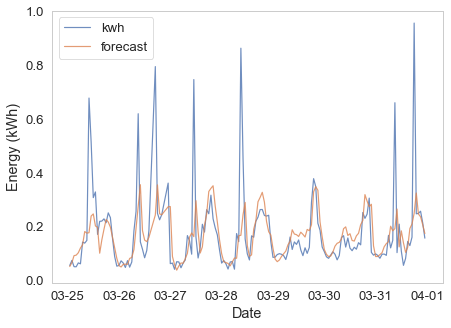

In [8]:
# Making the prediction on the validation set
# Only applicable if train_test_split in the conf.yml > 0
yhat = deep_learner.predict()

if len(yhat) > 0:

    # Constructing the forecast dataframe
    fc = d.tail(len(yhat)).copy()
    fc.reset_index(inplace=True)
    fc['forecast'] = yhat

    # Ploting the forecasts
    fig, ax1 = plt.subplots(figsize=(7, 5))
    for dtype in ['kwh', 'forecast']:
        ax1.plot(
            'Datetime',
            dtype,
            data=fc,
            label=dtype,
            alpha=0.8
        )
        
    ax1.set(xlabel="Date",
            ylabel="Energy (kWh)")
    
    # Define the date format
    date_form = DateFormatter("%m-%d")
    ax1.xaxis.set_major_formatter(date_form)
        
    plt.legend()
    plt.grid()
    
    plt.savefig('predictions5000.png', dpi=300, bbox_inches='tight')
    
    plt.show() 

In [9]:
# IMP Series for predictions; extracted from test split
#fc['forecast']
# Series for expected; extracted from test split
#fc['kwh']

In [10]:
#Accuracy metrics for the forecast: forecast bias, mean absolute error, mean squared error, and root mean square error
expected = fc['kwh']
predictions = fc['forecast']
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
bias = sum(forecast_errors) * 1.0/len(expected)
mae = mean_absolute_error(expected, predictions)
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
#print('Forecast Errors: %s' % forecast_errors)
print('Bias: %f' % bias)
print('MAE: %f' % mae)
print('MSE: %f' % mse)
print('RMSE: %f' % rmse)

Bias: 0.006901
MAE: 0.067702
MSE: 0.017585
RMSE: 0.132608


In [11]:
# Forecasting n steps ahead   

# Creating the model using full data and forecasting n steps ahead
deep_learner = DeepModelTS(
    data=d, 
    Y_var='kwh',
    lag=24,
    LSTM_layer_depth=64,
    epochs=500,
    train_test_split=0 
)

# Fitting the model 
deep_learner.LSTModel()

# Forecasting n steps ahead
n_ahead = 168
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

Epoch 1/500
1632/1632 [==============================] - 1s 462us/step - loss: 0.0363 - acc: 0.0000e+00
Epoch 2/500
1632/1632 [==============================] - 0s 247us/step - loss: 0.0205 - acc: 0.0000e+00
Epoch 3/500
1632/1632 [==============================] - 0s 269us/step - loss: 0.0183 - acc: 0.0000e+00
Epoch 4/500
1632/1632 [==============================] - 1s 337us/step - loss: 0.0169 - acc: 0.0000e+00
Epoch 5/500
1632/1632 [==============================] - 1s 352us/step - loss: 0.0168 - acc: 0.0000e+00
Epoch 6/500
1632/1632 [==============================] - 1s 350us/step - loss: 0.0167 - acc: 0.0000e+00
Epoch 7/500
1632/1632 [==============================] - 1s 347us/step - loss: 0.0165 - acc: 0.0000e+00
Epoch 8/500
1632/1632 [==============================] - 1s 375us/step - loss: 0.0163 - acc: 0.0000e+00
Epoch 9/500
1632/1632 [==============================] - 1s 344us/step - loss: 0.0162 - acc: 0.0000e+00 0s - loss: 0.0138 - acc: 0.0000e
Epoch 10/500
1632/1632 [=======

1632/1632 [==============================] - 1s 342us/step - loss: 0.0124 - acc: 0.0000e+00
Epoch 79/500
1632/1632 [==============================] - 1s 314us/step - loss: 0.0124 - acc: 0.0000e+00
Epoch 80/500
1632/1632 [==============================] - 1s 337us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 81/500
1632/1632 [==============================] - 0s 304us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 82/500
1632/1632 [==============================] - 1s 311us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 83/500
1632/1632 [==============================] - 0s 301us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 84/500
1632/1632 [==============================] - 1s 323us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 85/500
1632/1632 [==============================] - 0s 305us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 86/500
1632/1632 [==============================] - 1s 324us/step - loss: 0.0123 - acc: 0.0000e+00
Epoch 87/500
1632/1632 [==============================] - 1s 311us/s

1632/1632 [==============================] - 1s 325us/step - loss: 0.0118 - acc: 0.0000e+00
Epoch 156/500
1632/1632 [==============================] - 0s 304us/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 157/500
1632/1632 [==============================] - 1s 314us/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 158/500
1632/1632 [==============================] - 1s 307us/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 159/500
1632/1632 [==============================] - 1s 321us/step - loss: 0.0118 - acc: 0.0000e+00
Epoch 160/500
1632/1632 [==============================] - 1s 310us/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 161/500
1632/1632 [==============================] - 1s 323us/step - loss: 0.0117 - acc: 0.0000e+00
Epoch 162/500
1632/1632 [==============================] - 0s 296us/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 163/500
1632/1632 [==============================] - 1s 356us/step - loss: 0.0116 - acc: 0.0000e+00
Epoch 164/500
1632/1632 [==============================] - 0

1632/1632 [==============================] - 1s 370us/step - loss: 0.0114 - acc: 0.0000e+00
Epoch 233/500
1632/1632 [==============================] - 1s 351us/step - loss: 0.0113 - acc: 0.0000e+00
Epoch 234/500
1632/1632 [==============================] - 1s 315us/step - loss: 0.0114 - acc: 0.0000e+00
Epoch 235/500
1632/1632 [==============================] - 0s 306us/step - loss: 0.0113 - acc: 0.0000e+00
Epoch 236/500
1632/1632 [==============================] - 1s 320us/step - loss: 0.0113 - acc: 0.0000e+00
Epoch 237/500
1632/1632 [==============================] - 1s 354us/step - loss: 0.0113 - acc: 0.0000e+00
Epoch 238/500
1632/1632 [==============================] - 1s 323us/step - loss: 0.0113 - acc: 0.0000e+00
Epoch 239/500
1632/1632 [==============================] - 1s 310us/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 240/500
1632/1632 [==============================] - 1s 361us/step - loss: 0.0112 - acc: 0.0000e+00
Epoch 241/500
1632/1632 [==============================] - 1

1632/1632 [==============================] - 1s 322us/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 310/500
1632/1632 [==============================] - 1s 326us/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 311/500
1632/1632 [==============================] - 0s 304us/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 312/500
1632/1632 [==============================] - 1s 310us/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 313/500
1632/1632 [==============================] - 1s 334us/step - loss: 0.0110 - acc: 0.0000e+00
Epoch 314/500
1632/1632 [==============================] - 1s 347us/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 315/500
1632/1632 [==============================] - 1s 318us/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 316/500
1632/1632 [==============================] - 1s 329us/step - loss: 0.0109 - acc: 0.0000e+00
Epoch 317/500
1632/1632 [==============================] - 1s 309us/step - loss: 0.0111 - acc: 0.0000e+00
Epoch 318/500
1632/1632 [==============================] - 1

1632/1632 [==============================] - 1s 336us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 386/500
1632/1632 [==============================] - 1s 334us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 387/500
1632/1632 [==============================] - 1s 353us/step - loss: 0.0106 - acc: 0.0000e+00
Epoch 388/500
1632/1632 [==============================] - 1s 324us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 389/500
1632/1632 [==============================] - 1s 336us/step - loss: 0.0104 - acc: 0.0000e+00 0s - loss: 0.0103 - acc: 0.0000e+0
Epoch 390/500
1632/1632 [==============================] - 1s 324us/step - loss: 0.0104 - acc: 0.0000e+00
Epoch 391/500
1632/1632 [==============================] - 1s 339us/step - loss: 0.0104 - acc: 0.0000e+00
Epoch 392/500
1632/1632 [==============================] - 1s 329us/step - loss: 0.0106 - acc: 0.0000e+00
Epoch 393/500
1632/1632 [==============================] - 1s 326us/step - loss: 0.0107 - acc: 0.0000e+00
Epoch 394/500
1632/1632 [

1632/1632 [==============================] - 1s 330us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 461/500
1632/1632 [==============================] - 1s 309us/step - loss: 0.0103 - acc: 0.0000e+00
Epoch 462/500
1632/1632 [==============================] - 1s 319us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 463/500
1632/1632 [==============================] - 1s 328us/step - loss: 0.0103 - acc: 0.0000e+00
Epoch 464/500
1632/1632 [==============================] - 1s 327us/step - loss: 0.0102 - acc: 0.0000e+00
Epoch 465/500
1632/1632 [==============================] - 1s 320us/step - loss: 0.0105 - acc: 0.0000e+00
Epoch 466/500
1632/1632 [==============================] - 1s 322us/step - loss: 0.0106 - acc: 0.0000e+00
Epoch 467/500
1632/1632 [==============================] - 1s 320us/step - loss: 0.0104 - acc: 0.0000e+00
Epoch 468/500
1632/1632 [==============================] - 1s 328us/step - loss: 0.0108 - acc: 0.0000e+00
Epoch 469/500
1632/1632 [==============================] - 1

In [12]:
# Constructing the forecast dataframe
fc = d.tail(100).copy() 
fc['type'] = 'original'

last_date = max(fc['Datetime'])
hat_frame = pd.DataFrame({
    'Datetime': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'kwh': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)

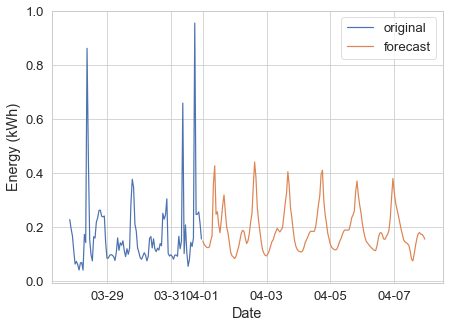

In [13]:
# Ploting the forecasts 
# Ploting the forecasts
fig, ax1 = plt.subplots(figsize=(7, 5))
for col_type in ['original', 'forecast']:
    ax1.plot(
        'Datetime', 
        'kwh', 
        data=fc[fc['type']==col_type],
        label=col_type
        )
    
ax1.set(xlabel="Date",
        ylabel="Energy (kWh)")

plt.legend()

# Define the date format
date_form = DateFormatter("%m-%d")
ax1.xaxis.set_major_formatter(date_form)

plt.savefig('Forecast.png', dpi=300, bbox_inches='tight')   